# Simulate Pareto Distribution from Sample
Using Julia, fit a data sample to a Pareto distribution comprised of a number of trials (draws) of your choosing. The default number of trials is 10,000. The Pareto principle or "80-20 rule" stating that 80% of outcomes are due to 20% of causes was named in honour of Pareto, but the concepts are distinct, and only Pareto distributions with shape value (α) of log45 ≈ 1.16 precisely reflect it. Empirical observation has shown that this 80-20 distribution fits a wide range of cases, including natural phenomena and human activities.

## 0. Import packages and define SimulateParetoDistributionFromSample function
Install (if necessary) and import the functions necessary to run the SimulateParetoDistributionFromSample function. Then define the function for later use. 

In [25]:
# using Pkg
# Pkg.add("DataFrames")
# Pkg.add("Distributions")
# Pkg.add("Plots")
# Pkg.add("PlotThemes")
# Pkg.add("KernelDensity")

using DataFrames
using Distributions
using Plots
using PlotThemes
using KernelDensity
gr()
theme(:bright)

function SimulateParetoDistributionFromSample(
    dataframe::DataFrame,
    column_name::String,
    trials::Integer=10000,
    show_plot::Bool=true
)
    # Get parameters for simulation
    Param_ParetoDistSim = fit(Pareto, dataframe[:, column_name])
    println("The shape parameter (α) used in simulation: ", Param_ParetoDistSim.α)
    println("The scale parameter (θ) used in simulation: ", Param_ParetoDistSim.θ)
    # Conduct simulation
    Arr_ParetoDistSim = rand(Param_ParetoDistSim, trials, 1)
    DF_ParetoDistSim = DataFrame(Arr_ParetoDistSim, :auto)
    # Get kernel density estimates for sample and simulation
    kde_sample = kde(dataframe[:, column_name])
    kde_simulation = kde(DF_ParetoDistSim[:, "x1"])
    # Generate plot if requested by user
    if show_plot
        title_for_plot = "Simulated Outcome (Pareto Distribution)"
        p = histogram(
            DF_ParetoDistSim[:, "x1"], 
            bins= :scott, 
            fillalpha= 0.4, 
            label= "Simulated Outcome", 
            title= title_for_plot, 
            xlabel=column_name
        )
        plot!(
            kde_simulation.x, 
            kde_simulation.density .* length(DF_ParetoDistSim[:, "x1"]) .* 0.1,
            linewidth= 3, 
            color= 1, 
            label= "Density of Simulation"
        )
        plot!(
            kde_sample.x, 
            kde_sample.density .* length(DF_ParetoDistSim[:, "x1"]) .* 0.1, 
            alpha= 0.6, 
            linewidth= 3, 
            color= 2, 
            label= "Density of Sample"
        )
        display(p)
    end
    # Return simulation results
    return DF_ParetoDistSim
end

SimulateParetoDistributionFromSample (generic function with 3 methods)

## 1. Import your data sample
First, import your data sample into Julia. This example uses a randomly generated dataset.

In [27]:
Arr_RandomNumbers = rand(1:10, 50, 1)
DF_RandomNumbers = DataFrame(Arr_RandomNumbers, :auto)

,x1
,Int64
1,5
2,10
3,5
4,1
5,2
6,6
7,3
8,9
9,6


## 2. Use the SimulateParetoDistributionFromSample function
Use the SimulateParetoDistributionFromSample function to simulate a Bernoulli distribution from your sample dataset.

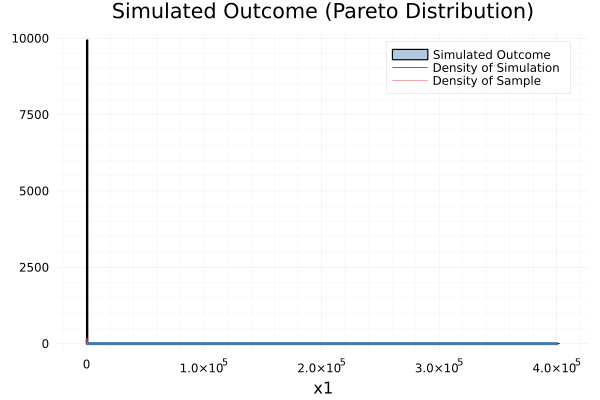

The shape parameter (α) used in simulation: 0.7246909548246216
The scale parameter (θ) used in simulation: 1.0


,x1
,Float64
1,1.39068
2,1.03305
3,1.93487
4,3.55127
5,1.64595
6,2.05879
7,1.35978
8,1.18804
9,1.30815


In [28]:
DF_Sim = SimulateParetoDistributionFromSample(DF_RandomNumbers, "x1")